
## Data Preprocessing and  Exploration





### Team Members

- Shiva Sai Praneeth Chakinala - 801147603
- Chaitanya Kintali - 801097831
- Prashanth Minkuri - 801166901
- Pranitha Amrutha Veldanda - 801166969

## Date Preparation

### Introduction of Data

We are performing our research on the data provided by Google that is collected from users who have opted-in to Location History for their Google Account.

In [2]:
import numpy as np
import pandas as pd

df_mobility = pd.read_csv('mobility.csv')
df_cases = pd.read_csv('cases_cleaned.csv')

In [3]:
print("shape of mobility dataset",df_mobility.shape)
print("shape of cases dataset",df_cases.shape)

shape of mobility dataset (705059, 14)
shape of cases dataset (14280, 16)


- Dataset 'mobility' comprises of 14280 observations and 14 features.
- Dataset 'cases' comprises of 14280 observations and 16 features.

In [4]:
# Prints the top 5 rows of the mobility dataset
df_mobility.head(5)

,country_code,country_region,state,county,metro_area,iso_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,US,United States,NaN,NaN,NaN,NaN,NaN,2/15/20,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2/16/20,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2/17/20,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2/18/20,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2/19/20,2.0,0.0,8.0,1.0,1.0,0.0


In [46]:
# Prints the top 5 rows of the cases dataset
df_cases.head(5)

,submission_date,state,tot_cases,new_case,tot_death,new_death,total_tests,cases_percent
0,2020-02-15,AK,0.0,0.0,0.0,0.0,0.0,NaN
1,2020-02-16,AK,0.0,0.0,0.0,0.0,0.0,NaN
2,2020-02-17,AK,0.0,0.0,0.0,0.0,0.0,NaN
3,2020-02-18,AK,0.0,0.0,0.0,0.0,0.0,NaN
4,2020-02-19,AK,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705059 entries, 0 to 705058
Data columns (total 14 columns):
country_code             705059 non-null object
country_region           705059 non-null object
state                    704779 non-null object
county                   690499 non-null object
metro_area               0 non-null float64
iso_code                 14280 non-null object
census_fips_code         690779 non-null float64
date                     705059 non-null object
retail_and_recreation    472245 non-null float64
grocery_and_pharmacy     430213 non-null float64
parks                    164094 non-null float64
transit_stations         267170 non-null float64
workplaces               681965 non-null float64
residential              368197 non-null float64
dtypes: float64(8), object(6)
memory usage: 75.3+ MB


In [7]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 16 columns):
submission_date    14280 non-null object
state              14280 non-null object
tot_cases          14268 non-null float64
conf_cases         5947 non-null float64
prob_cases         5947 non-null float64
new_case           14263 non-null float64
pnew_case          11157 non-null float64
tot_death          14262 non-null float64
conf_death         6327 non-null float64
prob_death         6327 non-null float64
new_death          14262 non-null float64
pnew_death         11065 non-null float64
created_at         14262 non-null object
consent_cases      12022 non-null object
consent_deaths     12302 non-null object
total_tests        13988 non-null float64
dtypes: float64(11), object(5)
memory usage: 1.7+ MB


In [8]:
df_mobility.describe().T

,count,mean,std,min,25%,50%,75%,max
metro_area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
census_fips_code,690779.0,30360.220888,15298.555620,1001.0,18105.0,29115.0,45051.0,56045.0
retail_and_recreation,472245.0,-9.171085,19.899894,-100.0,-20.0,-8.0,3.0,261.0
grocery_and_pharmacy,430213.0,1.659287,14.387482,-96.0,-7.0,1.0,9.0,225.0
parks,164094.0,34.829110,64.904962,-95.0,-9.0,21.0,65.0,709.0
transit_stations,267170.0,-11.204158,25.991175,-92.0,-29.0,-9.0,6.0,252.0
workplaces,681965.0,-22.663597,14.625218,-92.0,-32.0,-23.0,-14.0,66.0
residential,368197.0,7.411516,6.098827,-46.0,3.0,6.0,11.0,38.0


From the above table we can observe that maximum mobility is observed in the parks and minimum in retail_and_recreation

In [9]:
df_cases.describe().T

,count,mean,std,min,25%,50%,75%,max
tot_cases,14268.0,70649.603448,1.298176e+05,0.0,2475.75,20795.5,87691.0,1072698.0
conf_cases,5947.0,72553.584496,8.098506e+04,0.0,11651.00,44642.0,108785.0,634395.0
prob_cases,5947.0,3659.072810,5.599577e+03,0.0,129.50,1252.0,4829.5,41184.0
new_case,14263.0,805.884246,1.489443e+03,-10427.0,37.00,297.0,910.5,17844.0
pnew_case,11157.0,46.488931,1.974092e+02,-6259.0,0.00,0.0,23.0,5014.0
tot_death,14262.0,2035.965082,3.381592e+03,0.0,58.00,547.0,2420.0,20296.0
conf_death,6327.0,2614.613877,3.040045e+03,0.0,449.50,1552.0,3566.0,14900.0
prob_death,6327.0,156.958116,3.206120e+02,0.0,0.00,38.0,207.0,5482.0
new_death,14262.0,16.004628,4.561464e+01,-1824.0,0.00,4.0,16.0,2185.0
pnew_death,11065.0,0.922368,7.992104e+01,-5482.0,0.00,0.0,0.0,5482.0


From the above table,we can observe mean, maximum and minimum values for mobility of different places

## Basic Data cleaning

### Dealing with Data types

We have 2 different datatypes in our datasets which are :
- Numeric, 
- Categorical

We will be converting datatype of date column to datetype so that we can use that column to filter the data based on the datetime

In [10]:
df_mobility['date']= pd.to_datetime(df_mobility['date'])

df_cases['submission_date']= pd.to_datetime(df_cases['submission_date'])

In [11]:
print(df_mobility.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705059 entries, 0 to 705058
Data columns (total 14 columns):
country_code             705059 non-null object
country_region           705059 non-null object
state                    704779 non-null object
county                   690499 non-null object
metro_area               0 non-null float64
iso_code                 14280 non-null object
census_fips_code         690779 non-null float64
date                     705059 non-null datetime64[ns]
retail_and_recreation    472245 non-null float64
grocery_and_pharmacy     430213 non-null float64
parks                    164094 non-null float64
transit_stations         267170 non-null float64
workplaces               681965 non-null float64
residential              368197 non-null float64
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 75.3+ MB
None


### Feature Selection


Our dataset 'mobility' contains the values corresponding to each county within state. We are primarily focuing on analysing the state wise trends. Hence we are dropping all the rows corresponding to the each county.



In [12]:
df_mobility=df_mobility[df_mobility.state.notnull()]
df_mobility=df_mobility[df_mobility.county.isnull()]
df_mobility.drop(['county', 'metro_area','census_fips_code','country_code','country_region'], axis = 1,inplace=True)

Similary, we have
many columns such as prob_cases,created at we will be dropping all those columns

In [13]:
df_cases.drop(['prob_cases','created_at', 'conf_cases','prob_death','conf_death','pnew_death','pnew_case','pnew_case','consent_cases','consent_deaths'], axis = 1,inplace=True)

We will create a new column and store values by computing percentage of COVID positive cases using the columns 'New_cases' and 'Total_tests'

In [14]:
df_cases["cases_percent"]=(df_cases['new_case']*100)/df_cases['total_tests']

In [15]:
df_cases.tail()

,submission_date,state,tot_cases,new_case,tot_death,new_death,total_tests,cases_percent
14275,2020-11-16,WY,23193.0,699.0,144.0,0.0,357020.0,0.195787
14276,2020-11-17,WY,24453.0,1260.0,155.0,11.0,363992.0,0.346161
14277,2020-11-18,WY,25275.0,822.0,155.0,0.0,369292.0,0.222588
14278,2020-11-19,WY,26169.0,894.0,176.0,21.0,376123.0,0.237688
14279,2020-11-20,WY,27129.0,960.0,176.0,0.0,380669.0,0.252188


### Handling missing data

We have few null values in the columns 'parks' and 'transit_stations'. We will replaces those values with zeros so that we can caluclate accurate trends of the mobility to those place categories


In [16]:
df_mobility.isnull().sum().sort_values(ascending=False)

parks                    444
transit_stations         135
residential                0
workplaces                 0
grocery_and_pharmacy       0
retail_and_recreation      0
date                       0
iso_code                   0
state                      0
dtype: int64

In [17]:
df_mobility['parks']= df_mobility['parks'].fillna(0)
df_mobility['transit_stations']= df_mobility['transit_stations'].fillna(0)

In [18]:
df_mobility.isnull().sum().sort_values(ascending=False)

residential              0
workplaces               0
transit_stations         0
parks                    0
grocery_and_pharmacy     0
retail_and_recreation    0
date                     0
iso_code                 0
state                    0
dtype: int64

Dataset "cases" contains certain columns with many null values we will drop those columns

In [19]:
df_cases.isnull().sum().sort_values(ascending=False)

cases_percent      1181
total_tests         292
new_death            18
tot_death            18
new_case             17
tot_cases            12
state                 0
submission_date       0
dtype: int64

In [47]:
df_cases['new_death']= df_cases['new_death'].fillna(0)
df_cases['tot_death']= df_cases['tot_death'].fillna(0)
df_cases['new_case']= df_cases['new_case'].fillna(0)
df_cases['tot_cases']= df_cases['tot_cases'].fillna(0)
df_cases['cases_percent']= df_cases['tot_cases'].fillna(0)
df_cases['total_tests']= df_cases['tot_cases'].fillna(0)

In [48]:
df_cases.isnull().sum().sort_values(ascending=False)

cases_percent      0
total_tests        0
new_death          0
tot_death          0
new_case           0
tot_cases          0
state              0
submission_date    0
dtype: int64

Checking if both datasets have same number of rows

In [23]:
df_mobility.shape

(14280, 9)

In [24]:
df_cases.shape

(14280, 8)

Saving the cleaned dataset into seperate file

In [25]:
df_mobility.to_csv('mobility_cleaned.csv',header=True,index=False)

df_mobility= pd.read_csv('mobility_cleaned.csv')
df_mobility['date']=pd.to_datetime(df_mobility['date'])

### Merging columns of both datasets



In [26]:
df_cases['submission_date']= pd.to_datetime(df_cases['submission_date'])

states_mobility=df_mobility.iso_code.unique()
df_cases1 = pd.DataFrame()

for  stat in states_mobility:
    df_cases1=df_cases1.append(df_cases[(df_cases['submission_date'] >= '2/15/20') & (df_cases['submission_date'] <= '11/20/20') & (df_cases['state']==stat)])


In [27]:
df_cases1.shape
df_cases1['submission_date']= pd.to_datetime(df_cases1['submission_date'])

In [38]:
df_cases1 = df_cases1.sort_values(by = 'state') 
df_mobility = df_mobility.sort_values(by = 'state') 
df_cases.tail()

,submission_date,state,tot_cases,new_case,tot_death,new_death,total_tests,cases_percent
14275,2020-11-16,WY,23193.0,699.0,144.0,0.0,357020.0,0.195787
14276,2020-11-17,WY,24453.0,1260.0,155.0,11.0,363992.0,0.346161
14277,2020-11-18,WY,25275.0,822.0,155.0,0.0,369292.0,0.222588
14278,2020-11-19,WY,26169.0,894.0,176.0,21.0,376123.0,0.237688
14279,2020-11-20,WY,27129.0,960.0,176.0,0.0,380669.0,0.252188


In [29]:
df_mobility.head()

,state,iso_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Alabama,AL,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
177,Alabama,AL,2020-08-10,-7.0,-1.0,30.0,-3.0,-30.0,7.0
178,Alabama,AL,2020-08-11,-8.0,0.0,24.0,-5.0,-29.0,8.0
179,Alabama,AL,2020-08-12,-5.0,0.0,36.0,-2.0,-30.0,7.0
180,Alabama,AL,2020-08-13,-10.0,0.0,24.0,-3.0,-29.0,8.0


#### Adding the  column 'new_case' of df_cases1 to df_mobility

In [30]:
df_mobility['cases']=df_cases1['new_case']
df_mobility['cases_percent']=df_cases1['cases_percent']

In [31]:
df_mobility.tail(13)

,state,iso_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cases,cases_percent
14098,Wyoming,WY,2020-05-23,-9.0,14.0,107.0,25.0,-16.0,3.0,10.0,0.044707
14097,Wyoming,WY,2020-05-22,-5.0,18.0,120.0,32.0,-28.0,7.0,2.0,0.009019
14096,Wyoming,WY,2020-05-21,0.0,13.0,87.0,18.0,-27.0,8.0,14.0,0.065436
14086,Wyoming,WY,2020-05-11,-14.0,1.0,13.0,-2.0,-27.0,10.0,7.0,0.043734
14095,Wyoming,WY,2020-05-20,-2.0,7.0,66.0,10.0,-27.0,8.0,11.0,0.053732
14093,Wyoming,WY,2020-05-18,0.0,7.0,101.0,7.0,-25.0,6.0,12.0,0.062419
14092,Wyoming,WY,2020-05-17,-3.0,7.0,118.0,7.0,-13.0,1.0,13.0,0.070009
14091,Wyoming,WY,2020-05-16,-11.0,8.0,81.0,17.0,-14.0,4.0,25.0,0.135413
14090,Wyoming,WY,2020-05-15,-13.0,4.0,52.0,12.0,-27.0,10.0,15.0,0.082237
14089,Wyoming,WY,2020-05-14,-13.0,4.0,47.0,4.0,-29.0,10.0,13.0,0.073922


### Exploratory Data Analysis


#### Summarising the mobility trends accross all US States

In [33]:
df=pd.DataFrame()

df['transit_stations']=df_mobility.groupby(['iso_code'])['transit_stations'].mean()
df['parks']=df_mobility.groupby(['iso_code'])['parks'].mean()
df['retail_and_recreation']=df_mobility.groupby(['iso_code'])['parks'].mean()
df['workplaces']=df_mobility.groupby(['iso_code'])['workplaces'].mean()
df['grocery_and_pharmacy']=df_mobility.groupby(['iso_code'])['grocery_and_pharmacy'].mean()
df['retail_and_recreation']=df_mobility.groupby(['iso_code'])['retail_and_recreation'].mean()
df['cases']=df_mobility.groupby(['iso_code'])['cases'].mean()

#df['state']=df_mobility.groupby(['iso_code'])

sum1=df['cases'].sum()
df['cases']=df['cases']*1000/sum1

In [34]:
df = df.sort_values(by = 'cases')
df

,transit_stations,parks,retail_and_recreation,workplaces,grocery_and_pharmacy,cases
iso_code,,,,,,
VA,-30.153571,50.550000,-17.635714,-30.864286,-3.353571,0.300844
MA,-46.492857,54.614286,-22.007143,-35.114286,-9.478571,0.880695
HI,-55.032143,-42.217857,-36.150000,-33.357143,-20.139286,1.458633
NJ,-40.653571,75.450000,-25.910714,-34.314286,-5.339286,1.461330
DE,-25.539286,34.439286,-12.110714,-28.135714,-2.889286,1.723285
AL,-5.625000,28.303571,-11.550000,-23.182143,0.421429,2.207089
WY,17.896429,103.396429,-3.189286,-19.692857,12.564286,2.360208
DC,-60.321429,-32.782143,-46.739286,-46.903571,-20.114286,2.680975
WI,-12.821429,131.017857,-14.978571,-24.317857,0.914286,3.347738


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transit_stations,51.0,-19.799370,17.164535,-60.321429,-31.376786,-20.946429,-5.451786,17.896429
parks,51.0,58.381092,44.826679,-42.217857,28.953571,64.282143,89.301786,148.914286
retail_and_recreation,51.0,-15.040126,8.384639,-46.739286,-17.925000,-14.728571,-9.507143,-2.257143
workplaces,51.0,-27.609384,5.147570,-46.903571,-30.162500,-28.135714,-23.596429,-19.453571
grocery_and_pharmacy,51.0,-1.336485,6.935471,-20.139286,-4.785714,-1.435714,1.860714,16.617857
cases,51.0,19.607843,20.736153,0.300844,6.203495,15.268837,25.475828,93.324124


From the above table we can observe  following 

- Mobility has dropped to a greater extent to workplaces , transit_stations and retail_and_recreation. 
- Mbility has increased very much to parks 
- There was no significan difference in the mobility to grocery and pharmacy

#### Heatmap showing correlation between columns of mobility dataset

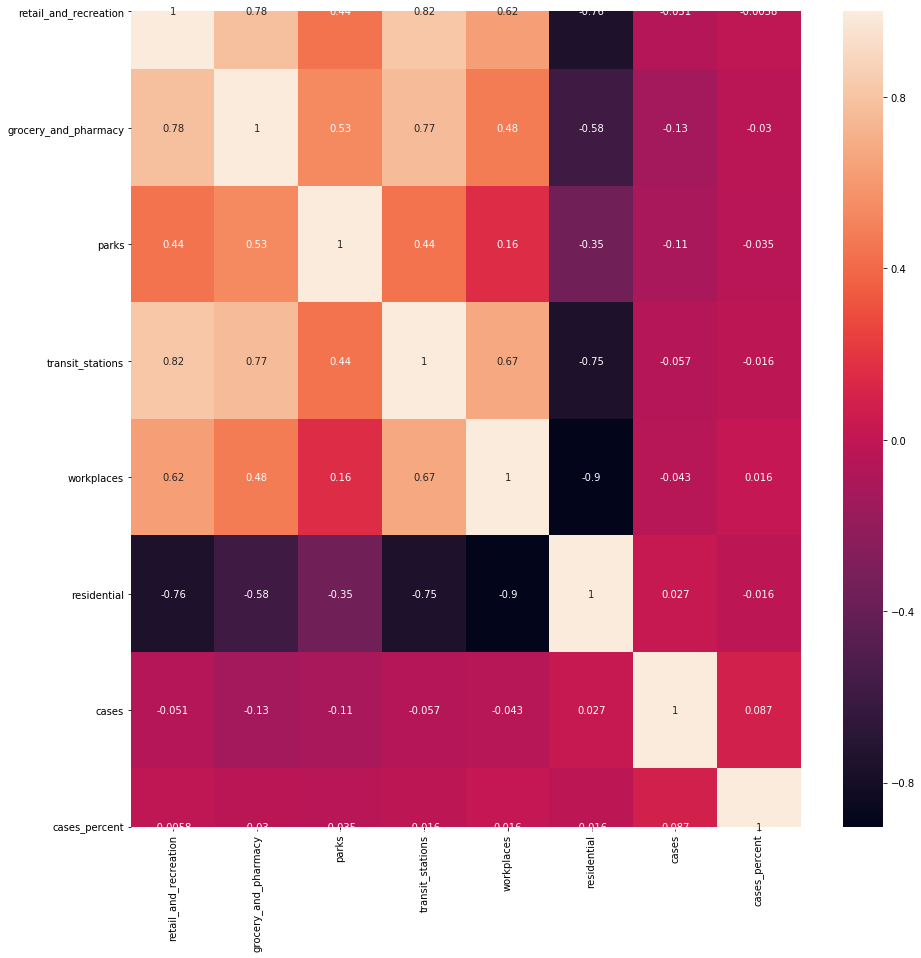

In [39]:

import seaborn as sns
import matplotlib as pl
import matplotlib.pyplot as plt


correlation=df_mobility.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

### Histograms on different columns of cases dataset

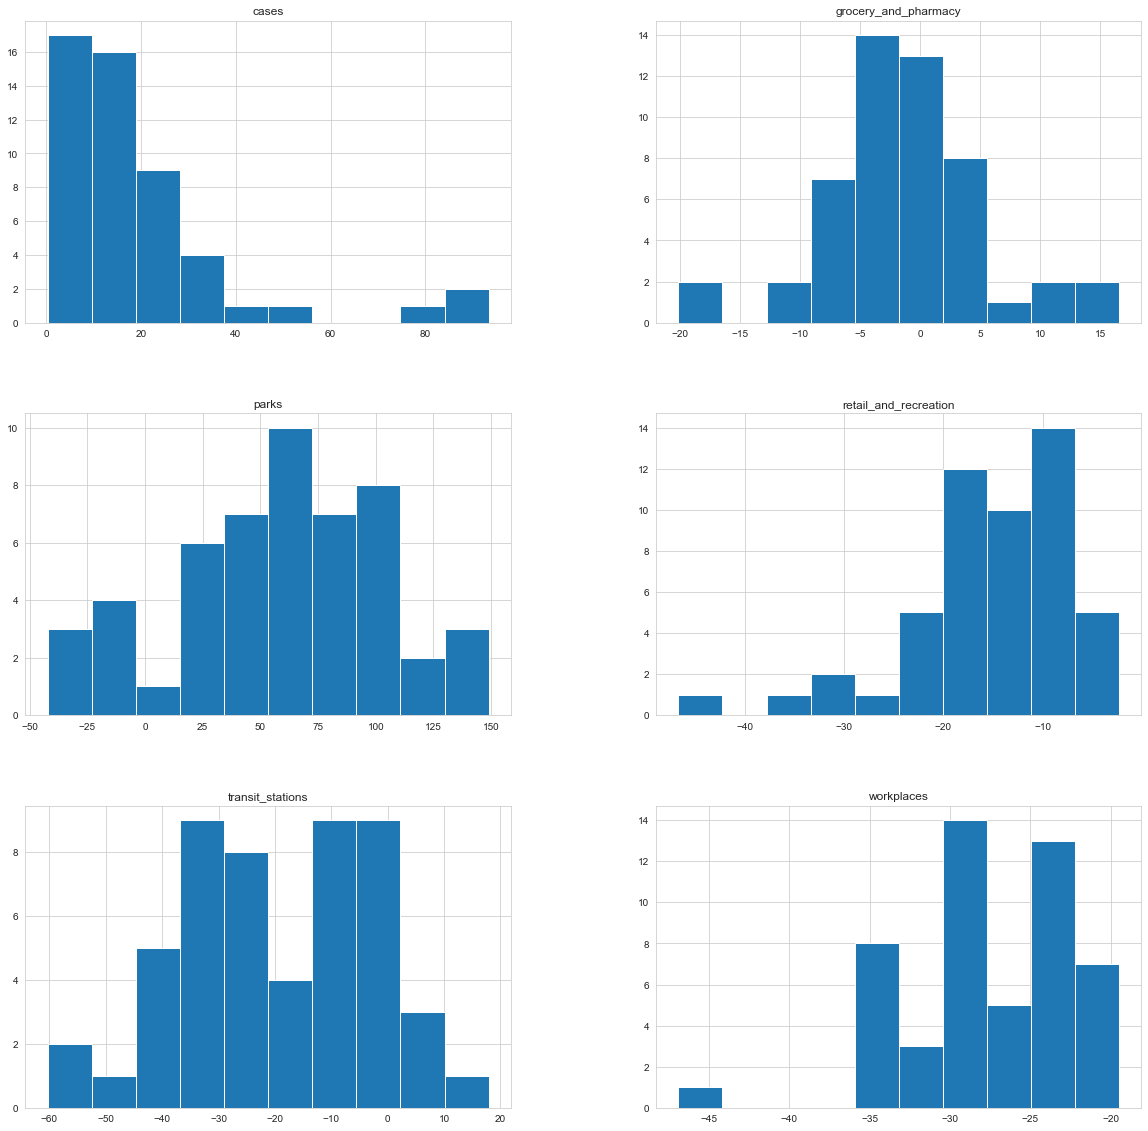

In [40]:
sns.set_style("whitegrid");
num=df.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20, 20))
plt.show() 


### Outlier Detection

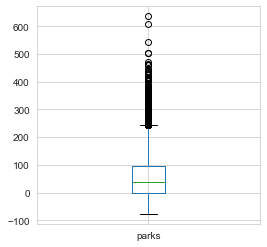

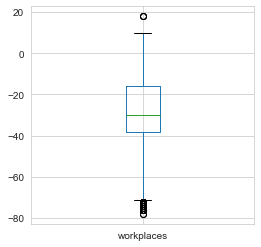

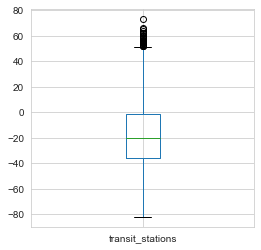

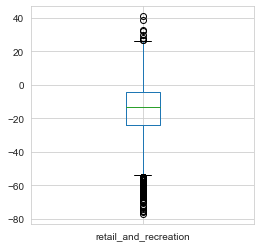

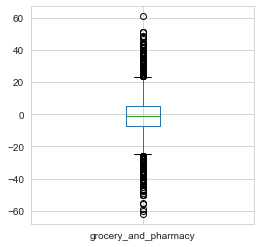

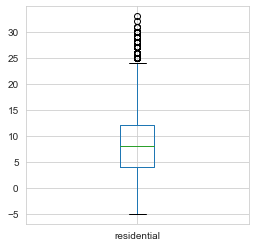

In [43]:
columns = ['parks',
       'workplaces','transit_stations','retail_and_recreation','grocery_and_pharmacy','residential']
for i in columns:
    df_mobility[str(i)].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4,4))
    plt.show() 

We can observe that there are outliers in every places